# Chapter 5: Integrals and Derivatives (Part 2)

In physics classes we often solve problems using integrals that can be solved analytically. In reality, there are many applications of physics involving integrals that can not be solved in analytical form. In many cases the integrals can only be solved numerically. In other cases, it may simply be convenient to solve numerically.

In Chapter 5 we explore some methods to solve different types of integrals, estimate cause of uncertainties in the estimated integrals and the size of those uncertainties. And similarly, we can investigate numerical calculations of derivatives. 

Integrals may be viewed as the "area under the curve" and we can simply add up rectangles of narrow width to approximate the true integral. However, rather than rectangular slices other shapes, such as trapezoids or quadratic equations, may provide a more accurate approximation with fewer steps. The efficiency of these alternate methods can dramatically speed up calculations with not too much more effort. Let's investigate the trapezoidal method and Simpson's method first!

### Fundamental Methods for evaluating integrals  
Let's start by implementing three methods discussed in the book. We will apply them to a function which we can integrate analytically. Comparing the approximations to the exact value of the integral will help us learn which methods are more efficient.

Let's use the function
$$
\int_{a=0.0}^{b=2.0} x^{4} - 2x + 1 \ dx
$$
**Question:** What is the value of this integral?
#### ANSWER: $\frac{22}{4}=4.4$
The integral is the difference of $ \frac{x^{5}}{5} - x^{2} + x $ evaluated at x=2 and x=0. This evaluates to 4.4 exactly.

First, let's just add up rectangles of different widths. Break the interval between a=0.0 and b=2.0 into N rectangles.
**Question:** What is the width, h, of each interval?
#### ANSWER: $h=\frac{(2.0-0)}{N}=\frac{2}{N}$
Write a short program that does the following tasks (you can see Example 5.1 or trapezoidal.py from the textbook for an example):
1. Creates a user defined function that simply returns the integrand, $x^{4} - 2x + 1$ at a point x.
2. Computes the mid-point of each rectangle: a+(0+0.5)h, a+(1+0.5)h, a+(2+0.5)h,... a+(k+0.5)h ...a+(N-1+0.5)h.
3. Evaluates the value of the function at the mid-point
4. Sums these values.
5. Multiplies by the width of each integral, h. 
6. Prints the estimated integral
7. Prints the difference from the exact value - estimated value.
8. Prints the fractional error (exact value-estimated value)/(exact value).

In [5]:
a = 0
b = 2
def f(x):
    return x**4-2*x+1

def riemannSum(N):
    h=(b-a)/N
    midpoints = [a+(k+0.5)*h for k in range(N)]
    heights = [f(mid) for mid in midpoints]
    sumHeights = sum(heights)
    area = h*sumHeights
    exact = 4.4
    difference = exact - area
    fracErr = difference/exact
    return N, area, abs(difference), abs(fracErr)

Estimate the integral for N steps as from N=10 to $N=10^{8}$. as indicated in the following cell. Record the difference in the array: (exact integral - estimated integral)

In [6]:
# Number of intervals used
N_intervals = [ 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8 ]
# Estimated integral
#Storing Values into arrays and printing them afterwards
sums = [riemannSum(N) for N in N_intervals]
Ns = [info[0] for info in sums]
MidpointMethod = [info[1] for info in sums]
MidpointMethodDifference = [info[2] for info in sums]
MidpointMethodFracError = [info[3] for info in sums]

for i in range(len(N_intervals)):
    print(f'N = {Ns[i]}; Estimated: {MidpointMethod[i]}, Difference: {MidpointMethodDifference[i]}, fractional error: {MidpointMethodFracError[i]}')

N = 10; Estimated: 4.3467600000000015, Difference: 0.053239999999998844, fractional error: 0.012099999999999736
N = 100; Estimated: 4.399466676000001, Difference: 0.000533323999999169, fractional error: 0.00012120999999981113
N = 1000; Estimated: 4.3999946666676015, Difference: 5.33333239882694e-06, fractional error: 1.2121209997333953e-06
N = 10000; Estimated: 4.399999946666663, Difference: 5.333333774615312e-08, fractional error: 1.2121213124125708e-08
N = 100000; Estimated: 4.39999999946663, Difference: 5.333706809551586e-10, fractional error: 1.2122060930799057e-10
N = 1000000; Estimated: 4.399999999994767, Difference: 5.233147248873138e-12, fractional error: 1.1893516474711676e-12
N = 10000000; Estimated: 4.399999999999746, Difference: 2.540190280342358e-13, fractional error: 5.773159728050814e-14
N = 100000000; Estimated: 4.399999999999498, Difference: 5.027089855502709e-13, fractional error: 1.142520421705161e-13


We can now try the trapezoidal method. It does the same thing except uses a trapezoid rather than a rectangle. A trapezoid is often a better approximation of the function (approximates as a line) in short intervals than a rectangle (approximates as a constant) in a short interval).

In the following cell, copy the code from Example 5.1 or use the code from trapezoidal.py on the textbook website.

In [1]:
def f(x):
    return x**4 - 2*x + 1

N = 2*10**1

a = 0.0
b = 2.0
def trapSum(N):
    h = (b-a)/N

    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    
    return N, h*s, abs(4.4-s*h), abs((4.4-s*h)/4.4)

area = trapSum(N)[1]

print(area) #Total Trapezoidal Area
print( abs(4.4-area) ) #Difference
print( abs((4.4-area)/4.4) )  # Fractional Error

4.426660000000001
0.026660000000000572
0.006059090909091039


Record the difference from the the exact value for the same number of intervals $N=10$ to $N=10**8$ as the midpoint method in an array below:

In [8]:
# Estimated interval, Difference from exact value
# Number of intervals used
N_intervals = [ 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8 ]
# Estimated integral
#Storing Values into arrays and printing them afterwards without manually recording
sums = [trapSum(N) for N in N_intervals]
Ns = [info[0] for info in sums]
TrapezoidalMethod = [info[1] for info in sums]
TrapezoidalMethodDifference = [info[2] for info in sums]
TrapezoidalMethodFracError = [info[3] for info in sums]

for i in range(len(N_intervals)):
    print(f'N = {Ns[i]}; Estimated: {TrapezoidalMethod[i]}, Difference: {TrapezoidalMethodDifference[i]}, fractional error: {TrapezoidalMethodFracError[i]}')

N = 10; Estimated: 4.50656, Difference: 0.10655999999999999, fractional error: 0.024218181818181812
N = 100; Estimated: 4.401066656, Difference: 0.0010666559999998881, fractional error: 0.00024242181818179273
N = 1000; Estimated: 4.400010666665601, Difference: 1.0666665600567171e-05, fractional error: 2.424242181947084e-06
N = 10000; Estimated: 4.400000106666671, Difference: 1.0666667105141414e-07, fractional error: 2.4242425238957758e-08
N = 100000; Estimated: 4.400000001066634, Difference: 1.0666338923215335e-09, fractional error: 2.424167937094394e-10
N = 1000000; Estimated: 4.400000000010726, Difference: 1.0725642596298712e-11, fractional error: 2.4376460446133437e-12
N = 10000000; Estimated: 4.39999999999998, Difference: 2.042810365310288e-14, fractional error: 4.642750830250654e-15
N = 100000000; Estimated: 4.39999999999845, Difference: 1.5507595207964187e-12, fractional error: 3.524453456355497e-13


Now implement a similar algorithm using Simpson's method. This method uses intervals of width 2h and approximates the
integrand using a quadratic function, $Ax^{2}+Bx+C$, "fit" to that interval. that is we pick three points around the midpoint of this interval. That is
$$
f(-h) = Ah^{2} - Bh + C, \qquad f(0)=C, \qquad f(h) = Ah^{2} + Bh + C
$$
Solving for A, B and C,
$$
A = \frac{1}{h^{2}} \left[ \frac{1}{2}f(-h) - f(0) + f(h) \right], \qquad B = \frac{1}{2h} \left[ f(h)-f(-h) \right], \qquad C = f(0)
$$

If we do this for some (even) number of intervals of width $2h$ we arrive at an expression for the numerical integral given by Eq. 5.9 in the textbook.
$$
I(a,b) = \frac{1}{3}h \left[ f(a)+f(b) + 4 \sum_{k odd=1...N-1} f(a+kh) + 2 \sum_{k even=2...N-2} f(a+kh) \right]
$$

Implement a similar algorithm to that for the trapezoidal method above. You will need two sums now. One will be over odd values of k "for k in range(1,N,2)" and another over even k "for k in range(2,N,2)". Don't forget to add the values at f(a) and f(b).

In [9]:
def f(x):
    return x**4 - 2*x + 1

N = 10**1

a = 0.0
b = 2.0
def simpSum(N):
    h = (b-a)/N

    s = f(a) + f(b)
    for k in range(1,N,2):
        s += 4.*f(a+k*h)

    for k in range(2,N,2):
        s += 2.*f(a+k*h)
    return N, h*s/3, abs(4.4-h*s/3), abs((4.4-h*s/3)/4.4)

area = simpSum(N)[1]

print(area)
print( abs(4.4-area) )
print( abs((4.4-area)/4.4))

4.400426666666668
0.0004266666666676855
9.696969696992851e-05


In [10]:
# Estimated interval, Difference from exact value
# Number of intervals used
N_intervals = [ 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8 ]
# Estimated integral
#Storing Values into arrays and printing them afterwards without manually recording
sums = [simpSum(N) for N in N_intervals]
Ns = [info[0] for info in sums]
SimpsonsMethod = [info[1] for info in sums]
SimpsonsMethodDifference = [info[2] for info in sums]
SimpsonsMethodFracError = [info[3] for info in sums]

for i in range(len(N_intervals)):
    print(f'N = {Ns[i]}; Estimated: {SimpsonsMethod[i]}, Difference: {SimpsonsMethodDifference[i]}, fractional error: {SimpsonsMethodFracError[i]}')

N = 10; Estimated: 4.400426666666668, Difference: 0.0004266666666676855, fractional error: 9.696969696992851e-05
N = 100; Estimated: 4.400000042666667, Difference: 4.266666664420882e-08, fractional error: 9.69696969186564e-09
N = 1000; Estimated: 4.400000000004266, Difference: 4.2659209498197015e-12, fractional error: 9.695274885953866e-13
N = 10000; Estimated: 4.400000000000002, Difference: 1.7763568394002505e-15, fractional error: 4.037174635000569e-16
N = 100000; Estimated: 4.400000000000028, Difference: 2.7533531010703882e-14, fractional error: 6.257620684250882e-15
N = 1000000; Estimated: 4.400000000000044, Difference: 4.3520742565306136e-14, fractional error: 9.891077855751393e-15
N = 10000000; Estimated: 4.400000000000126, Difference: 1.2523315717771766e-13, fractional error: 2.846208117675401e-14
N = 100000000; Estimated: 4.40000000000205, Difference: 2.049915792667889e-12, fractional error: 4.658899528790657e-13


The following two cells produce different types of plots (linear, log-log, semi-log). First for the difference between the exact and numerical integra, then for the fractional error.

'\nplot(N_intervals,log(MidpointMethodDifference))\nplot(N_intervals,log(TrapezoidalMethodDifference))\nplot(N_intervals,log(SimpsonsMethodDifference))\nxlabel("N")\nylabel("ln(exact value - numerical estimate)")\n'

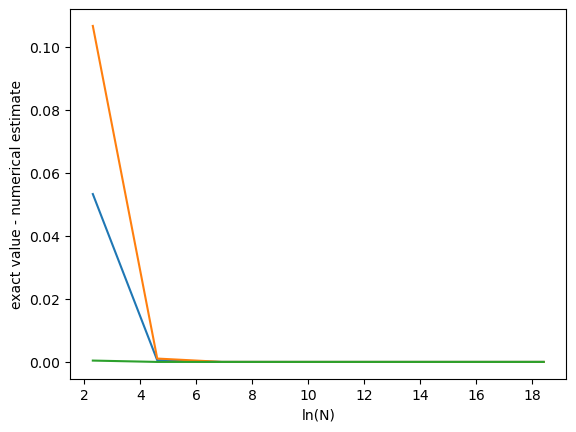

In [16]:
from pylab import plot,xlabel,ylabel
from numpy import log

#print(N_intervals,"  ",MidpointMethodDifference)
#'''
plot(log(N_intervals),MidpointMethodDifference)
plot(log(N_intervals),TrapezoidalMethodDifference)
plot(log(N_intervals),SimpsonsMethodDifference)
xlabel("ln(N)")
ylabel("exact value - numerical estimate")
#'''
'''
plot(N_intervals,MidpointMethodDifference)
plot(N_intervals,TrapezoidalMethodDifference)
plot(N_intervals,SimpsonsMethodDifference)
xlabel("N")
ylabel("exact value - numerical estimate")
'''
'''
plot(log(N_intervals),log(MidpointMethodDifference))
plot(log(N_intervals),log(TrapezoidalMethodDifference))
plot(log(N_intervals),log(SimpsonsMethodDifference))
xlabel("ln(N)")
ylabel("ln(exact value - numerical estimate)")
'''
'''
plot(N_intervals,log(MidpointMethodDifference))
plot(N_intervals,log(TrapezoidalMethodDifference))
plot(N_intervals,log(SimpsonsMethodDifference))
xlabel("N")
ylabel("ln(exact value - numerical estimate)")
'''

[10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]    [0.012099999999999736, 0.00012120999999981113, 1.2121209997333953e-06, 1.2121213124125708e-08, 1.2122060930799057e-10, 1.1893516474711676e-12, 5.773159728050814e-14, 1.142520421705161e-13]


Text(0, 0.5, 'ln(fractional error)')

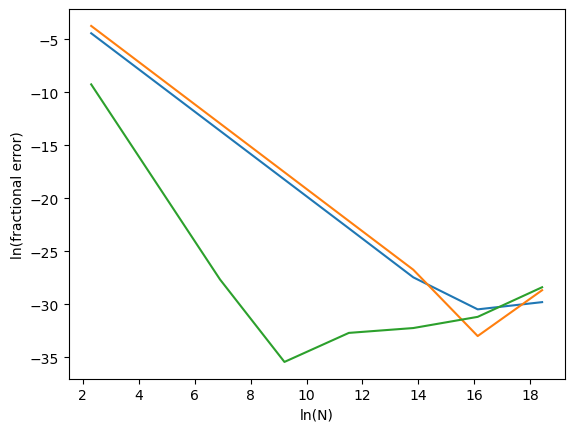

In [17]:
# Plot the Fracional Error for each method

print(N_intervals,"  ",MidpointMethodFracError)
plot(log(N_intervals),log(MidpointMethodFracError)) #Orange
plot(log(N_intervals),log(TrapezoidalMethodFracError)) #Blue
plot(log(N_intervals),log(SimpsonsMethodFracError)) #Green
xlabel("ln(N)")
ylabel("ln(fractional error)")

**Question:** Is there a limit to the accuracy which you can get? 
#### ANSWER: Yes, the simpsons method has the best accuracy for first range of N intevals, but the minimum is around ln(N)=9, then the simpson's fractional error goes back to increasing.

**Question:** Which method reaches the best estimate range with the fewest number of steps?
#### ANSWER: The simpson's method easily reaches the best estimate range with the fewest number of steps


### Complete Exercise 5.3 (You can do this application as homework later and continue for now.)
Hint: Copy and paste your code for one of the methods above?  
Note: This integral cannot be computed analytically. 

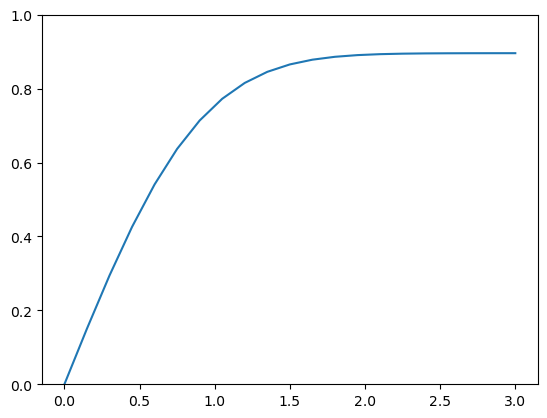

0.8958316349845851


In [20]:
from math import exp
from numpy import linspace,abs
from pylab import plot,ylim,show

xmin = 0.0
xmax = 3.0
steps = 20
deltax = (xmax-xmin)/steps
N=100
h = deltax/N

# Integrand
def f(t):
    return exp(-t*t)

# Trapezoidal rule
E = 0.0
xpoints = linspace (xmin, xmax, steps+1)
ypoints = []
for x in xpoints:
    ypoints.append(E)
    E += 0.5*h*(f(x)+f(x+N*h))
    for k in range(N):
        E += h*f(x+k*h)

# Make the plot
plot(xpoints, ypoints)
ylim(0.0, 1.0)
show()

This is the Gaussian Error Function. As the book notes there is no way to solve this integral analytically. It must be done numerically by using these types of methods. The method can be chosen depending on the required speed, accuracy and an understanding of the accuracy of the different methods for that case.

# Errors on Integrals

The textbook outlines in Section 5.2 methods to determine the uncertainty in our estimated integrals. With a generic Taylor expantion of the integrand, f(x), around points $x_{k-1}$ and $x_{k}$, and with some algebra, we arrive at an expression for the error when we use the Trapezoidal method. This is given by Eq. 5.20,
$$
\epsilon = \frac{1}{12}h^{2} \left[ f^{'}\left( a\right) - f^{'}\left( b\right) \right]
$$
which is called the Euler-Maclaurin formula for the error on the Trapezoidal rule. It is proportional to $h^{2}$. We have neglected higher order terms so this is only an **estimate** of the error. However, if we choose small widths, $h$, for our trapezoids terms like $h^{4}$, $h^{6}$, etc. should be much, much smaller.

Because the error depends on $h^{2}$, we call it a *first-order* integration rule. It is only accurate up and including terms proportional to h.

In [6]:
def f_prime(x):
    return 4*x**3 - 2

N=10**1
a = 0.0
b = 2.0
h = (b-a)/N
epsilon = (h**2)*(f_prime(a) - f_prime(b))/12.

print("epsilon = ",abs(epsilon))
print(1/1200*(f_prime(0)-f_prime(2)))

epsilon =  0.10666666666666669
-0.02666666666666667


For many values of N this approximation error is more significant than rounding error due to machine precision. However, when N, and therefore the width, h, of our trapezoids is extremely small it reaches a limit where rounding error does become important. This happens around $\sqrt{10^{-16}}$ which turns out to be $10^{-8}$. 

**Question:** What happened in your graph of fractional errors around $N=10^{8}$ for the trapezoidal rule?
#### ANSWER: At $N=10^8$, $\ln(N)\approx18$, the fractional error for the trapezoidal error flattens out and even slightly increases.


Note that there is no reason to use narrower intervals beyond this point. The accuracy won't improve. A different method would be required to get a more accurate estimate of the integral.

For Simpson's method, the error estimate is
$$
\epsilon = \frac{1}{180}h^{4} \left[ f^{'''}\left( a\right) - f^{'''}\left( b\right) \right]
$$
This is a *third-order* integration rule (error is proportional to $h^{4}$). Notice in your graph of fractional errors that for Simpson's method, the maximum accuracy possible is obtained around $N=10^{4}$ intervals. We achieve the same accuracy with many fewere steps.

We can estimate this error from our calculations themselves.

# Start of new notebook

**Practical Estimate of Error**
If we know the analytical function $f(x)$ the formula derived above provide estimates of the error. In many cases we will not know the exact function. It may be the output of another calculation or it may be constructed from measurements (an example, the speed of an object measured at different times). There is another way to estimate the error. It involves using the same numerical integration method two times with $N$ and then $N/2$ steps.

Consider the trapezoidal. The expression for the error tells us that the error on our approximation of the true value is proportional to $h^{2}$. That is, the error is of order $O(h^{2})$. First, compute the integral, $I_{1}$, with the trapezoidal method using intervals of width $h_{1}=(b-a)/N)$. This has error, $O(h_{1}^{2})$, which we can write as a proportionality constant, c, times $h_{1}^{2}$, or $ch_{1}^{2}$. Second, double the number of intervals, $h_{2} = (b-a)/(2N) = h_{1}/2$. This has error $O(h_{2}^{2})$, which can be write as $ch_{2}^{2} = ch_{1}^{2}/4$. This means our error for N intervals is 4 times the error for 2N intervals (for the trapezoidal method). Equate the numerical integrals plus their approximate errors:
$$
I_{1} + 4ch_{2} = I_{2} + ch_{2}.
$$
Solving for the uncertainty, ch^{2}, we find that
$$
\epsilon_{2} = ch_{2}^{2} = \frac{1}{3} \left( I_{2} - I_{1} \right).
$$
That is, we can estimate the error, when integrating with the trapezoidal rule, by repeating the calculation with half the intervals and dividing by three!. (The same procedure for Simpson's rule gives $\epsilon_{2} = \frac{1}{15} \left( I_{2} - I_{1} \right)$.

**Question:** Use your code for the trapezoidal rule from above to integrate the same function. Compute the integral with $N=10$ and $N=20$ intervals. What is your estimate of the error?
#### ANSWER:
**For $N=10: \epsilon_{10}=0.024218181818181812$**  
**For $N=20: \epsilon_{20}=0.006059090909091039$**


**Question:** What is the difference between the exact value, 4.4, and the integral using the trapezoidal method with N=20 intervals? Is it close to last two estimates? 
#### ANSWER: The difference between trapezoidal and exact is 0.026660000000000572.



**Question:** Compute the error from a few cells above using the derivatives, $\epsilon=\frac{1}{12}[f^{'}(a)-f^{'}(b)]$,  with N=20 intervals. How does this compare to your estimate in the previous question?  
#### ANSWER: Using the derivatives, the error is calculated as 0.02666666666666667, this is extremely close to the previous calculation.


**NOTE:** Both ways of estimating give similar errors usually. The second way requires two numerical integrations but can work in situations where we don't know the equation for the derivatives


### Choosing the number of steps

Often we only need an integral to a certain accuracy. Perhaps a calculation involves experimental values that have an accuracy of $0.00001$ which limits the number of significant figures in our calculation. We probably do not need to invest  effort getting an integral more accurate than that. Let us determine the best number of steps to use. 

We see that doubling the number of steps gives an estimate of the error. For the trapezoidal method $\epsilon_{2} = {{1} \over {3}} (I_{2} - I_{1})$. If we double again, $\epsilon_{3} = {{1} \over {3}} (I_{3} - I_{2})$. Here, $I_{3}$ is computed with $N_{3}=2N_{2}=4N_{1}$ steps. We can repeat this process until
$$
\epsilon_{i} = {{1} \over {3}} \left( I_{i} - I_{i-1} \right)
$$
is below our desired accuracy.

It turns out that, by doubling the number of steps N each time, we already have calculated half the values in $I_{i}$. $I_{i}$ includes all the points in I_{i-1}. We must only calculate the new points using Eq. 5.34,
$$
I_{i} = {{1} \over {2}}I_{i-1} + h_{i} \sum_{k odd=1...N_{i}-1} f(a+kh_i)
$$

To calculate the integral $I_{i}$ we reuse the value $I_{i-1}$ but with a weight of ${{1} \over {2}}$ now. Each time we double $N_{i}$ and compute $\epsilon_{i}$ all we have to do is the second sum in the last equation. When $\epsilon_{i}$ reaches our desired accuracy, we stop. The integral $I_{i}$ is already computed and we are done.

What are the advantages of this *adaptive integration* approach? We save time and processing effort. We get our result more efficiently. With almost no extra effort, we obtain the integral value, plus an estimate of the approximation error. And, our desired accuracy is guaranteed. 

A similar procedure is derived for Simpson's method in the textbook, Section 5.3.

There are more advanced integration methods that can achieve extreme accuracy (in some cases). They require more effort up front, however. They have advantages in some ways but also disadvantages in others. Here, I will just describe them in general, based upon what we have explored above. See the text for more details.

### Romberg Integration
The derivation and description is in Section 5.4. Through an iterative process that is similar to the *adaptive integral* method just outlined, it is possible to obtain much more accurate results, more quickly. It also provides an error estimate at each step so we can stop as soon as our integral value has our desired accuracy. 

This method is good for smooth, well behaved integrands, $f(x)$. If there are pathologies like rapid fluctuations, singularities or noisy values in $f(x)$, then a simpler adaptive method (like the adaptive trapezoidal method from the previous sections is a better choice.

### Higher-order Integration Methods

In the example above, we explored an *adaptive integration* method based on the trapezoidal rule. Simpson's rule used a quadratic equation to approximate the functions. We could develop similar methods using cubic, quartic, etc. equations. 

From the simple example with trapezoidal rule, we note that it relied on evenly spaced intervals $x_{i-1}=a+(i-1)h$ to $x_{i}=a+ih$. These examples are easy to program using for loops. 

If we instead choose unevenly spaced "sample points," $x_{k}$, and use higher order polynomials, both accuracy speed of the numerical integral calculation may be increased. Doing this leads to an excellent integration method called *Gaussian quadrature.* These are more difficult to code by hand, but we can import implementations from Python packages.

Note the subscript on p. 168 of the textbook. These methods are actually very old. Long ago, numerical derivatives were computed by hand. (Remember there are many functions that cannot be integrated analytically.) This is why finding extremely efficient ways to perform the integrals in as few steps as possible were developed.

The derivation of Gaussian quadrature method is given in the book. We will compare the efficiency of this method to the earlier methods below.


**Exercise:** To investigate the efficiency of the Gaussian quadrature integration method we will integrate the same function as the earlier method? 
1. **(I just pasted it in the next cell.)** Download the file gaussxw from the textbook website or Blueline. Make sure it is in the same directory as this Notebook.
2. Enter the code from Example 5.2 in a cell below the gaussxw code. Use N=3 "sample points"). This is **significantly** less than for the trapezoidal method or Simpson's method.
3. Answer the questions below.

In [25]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [ ]:
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x +1

N=3
a=0.0
b=2.0

x, w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

**Question:** What is the value of the integral using Gaussian quadrature with $N=3$? How does this compare to the trapezoidal method or Simpson's method with $N=10^{8}$?
#### ANSWER: The Gaussian Quadrature has an accuracy better by 3 orders of magnitude while only taking three steps.
**Gaussian Quadrature (N=3):     4.4000000000000075**  
**Trapezoidal Method (N=$10^8$): 4.39999999999845**  
**Simpson's Method (N=$10^8$):   4.40000000000205**


This may seem like magic. If you're interested in how this is possible, follow through the textbook derivation. It may be worth following the derivations for trapezoidal method, Simpson's method, adaptive integragion, Romberg integration and higher-order methods and then Gaussian quadrature. Understanding the simpler cases first, you will see how the more complex cases use some very similar steps. 

#### Errors on Gaussian Quadrature
With Gaussian quadrature, estimating the approximation error is not quite as straightforward as the simpler methods but there are techniques described in Section 5.6.3.

#### Choosing an integration method
We have seen a number of methods some very simple to implement others more complex but extremely accurate and efficient. Section 5.7 gives some guidelines for choosing which is best. There is no absolute answer for which is best to use. It is important to be aware of these factors. 

In general, the more complex methods work best for rather smooth, well-behaved functions. If the integrand has pathologies such as singularities, rapid variations, is composed of noisy data then the simple trapezoidal method may turn out to be the best choice.

### Integration Over Infinite Ranges
Integrating over an infinite range with our techniques would require an infinite number of intervals or "sample points." We can use a trick. We may use a change of variables, substituting
$$
z = \frac{x}{1+x} \quad \text{or} \quad x = \frac{z}{1-z}
$$
Then $dx = dz/(1-z)^{2}$ and we can transform the integral:
$$
\int_{0}^{\infty} f(x) \ dx = \int_{0}^{1} \frac{1}{(1-z)^{2}} f \left( \frac{z}{1-z} \right) \ dz.
$$
This is a good transformation to begin with. It doesn't always work but there are other similar options to try as discussed in Section 5.8.

**Exercise:** In the following cell, enter the code from Example 5.3 in the textbook (or from the textbook website in the file intinf.py). Compare the accuracy of this implementation of Gaussian quadratures to the function
$$
\int_{0}^{\infty} \exp^{-t^{2}} \ dt = \int_{0}^{1} \frac{\exp^{-z^{2}/(1-z)^{2}}}{(1-z)^{2}} \ dt
$$
We integrated this over a finite range before. Here we do an infinite range so we must transform the integrand. Notice that this transformation changes the limits from an infinite range $(0,\infty)$ to a finite range $(0,1)$. Really, after this transformation, we can use any of the techniques discussed so far. How does the accuracy sompare to the exact value $\sqrt{\pi}/2 = 0.886226925453$?
#### ANSWER: Utilizing Gaussian Quadrature with an N of 20, these definite integrals match pretty closely.
**Gaussian Quadrature (N=20): 0.8862261838125776**

In [31]:
# Enter the code from Example 5.2 or intinf.py here
from gaussxw import gaussxw

def f(z):
    return exp(-(z**2)/((1-z)**2))/((1-z)**2)

N=20
a=0.0
b=1.0

x, w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

0.8862261838125776


### Multiple Integrals
Section 5.9 briefly discusses extending these techniques to multiple integrals over more than one direction. This is generally straight forward using the same techniques twice. There are also more advanced techniques, Monte Carlo integration for example, that we may discuss in later chapters.



## Derivatives

Numerical derivatives are less common than numerical integrals. Derivatives can always be calculated. However, there are places where they can be very useful, such as solving partial differential equations in a later chapter. This section of Chapter 5 also discusses some issues with numerical derivatives. In particular rounding errors may become as significant as approximation errors more easily than for numerical integration. 

You probably encountered these concepts in a calculus class. For review, just read through the section to remind yourself of some calculus fundamentals.

## Mini-project
Can you think of problems in classes, either in the past intro level classes or current classes, where a numerical integral may have been useful? Could you have checked a complicated integral with a numerical calculation to see if your formula was correct? Numerical integration may provide the basis for one of your mini-projects. I will provide more details soon. Hopefully these questions will help you think about how Computational physics might contribute in classes you have had or are taking right now!